In [1]:
pip install overpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [2]:
import overpy
import csv

def fetch(lat, lon, amenity_types, radius):
    api = overpy.Overpass()

    # Define the filename for storing all amenities in one file
    filename = 'amenities_generic.csv'

    # Create or overwrite the CSV file and write the header only once
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Amenity Type', 'Name', 'Latitude', 'Longitude'])

    # Iterate over each amenity type in the list
    for amenity_type in amenity_types:
        # Calculate the bounding box
        min_lat = lat - radius
        max_lat = lat + radius
        min_lon = lon - radius
        max_lon = lon + radius

        # Construct the Overpass query
        query = f"""
        [out:json];
        node["amenity"="{amenity_type}"]({min_lat},{min_lon},{max_lat},{max_lon});
        out body;
        """

        try:
            # Execute the query
            result = api.query(query)

            # Check if any nodes are found
            if not result.nodes:
                print(f"No {amenity_type}s found near the given coordinates.")
                continue

            # Open the CSV file in append mode to add data for each amenity type
            with open(filename, 'a', newline='') as csvfile:
                writer = csv.writer(csvfile)

                # Write each node's data
                for node in result.nodes:
                    name = node.tags.get("name", "Unknown")
                    node_lat = node.lat
                    node_lon = node.lon
                    writer.writerow([amenity_type, name, node_lat, node_lon])

            print(f"Results for {amenity_type} added to '{filename}'.")

        except overpy.exception.OverpassTooManyRequests:
            print("Too many requests to Overpass API. Please try again later.")
        except Exception as e:
            print(f"An error occurred while processing {amenity_type}: {e}")

if __name__ == "__main__":
    try:
        lat = float(input("Enter the latitude (e.g., 28.6139 for Delhi): "))
        lon = float(input("Enter the longitude (e.g., 77.2090 for Delhi): "))

        # List of amenities
        amenity_types = [
            'bar', 'biergarten', 'cafe', 'fast_food', 'food_court', 'ice_cream', 'pub', 'restaurant',
            'college', 'dancing_school', 'driving_school', 'first_aid_school', 'kindergarten', 'language_school',
            'library', 'surf_school', 'toy_library', 'research_institute', 'training', 'music_school', 'school',
            'university', 'bicycle_parking', 'bicycle_repair_station', 'bicycle_wash', 'boat_rental', 'vehicle_inspection',
            'charging_station', 'driver_training', 'ferry_terminal', 'fuel', 'grit_bin', 'motorcycle_parking', 'parking',
            'parking_entrance', 'parking_space', 'taxi', 'atm', 'payment_terminal', 'bank', 'money_transfer', 'payment_centre',
            'clinic', 'dentist', 'doctors', 'hospital', 'nursing_home', 'pharmacy', 'veterinary', 'arts_centre', 'brothel',
            'casino', 'cinema', 'community_centre', "conference_centre", "events_venue", "exhibition_centre", "fountain",
            "gambling", "love_hotel", "music_venue", "nightclub", "planetarium", "public_bookcase", "social_centre",
            "stage", "stripclub", "studio", "swingerclub", "theatre", "courthouse", "fire_station", "police", "post_box",
            "post_depot", "post_office", "prison", "bbq", "bench", "dog_toilet", "dressing_room", "drinking_water",
            "give_box", "mailroom", "parcel_locker", "shelter", "shower", "telephone", "toilets", "water_point",
            "watering_place", "sanitary_dump_station", "recycling", "waste_basket", "waste_disposal", "waste_transfer_station",
            "animal_boarding", "animal_breeding", "animal_shelter", "animal_training", "baking_oven", "clock", "crematorium",
            "dive_centre", "funeral_hall", "grave_yard", "hunting_stand", "internet_cafe", "kitchen", "kneipp_water_cure",
            "lounger", "marketplace", "monastery", "mortuary", "photo_booth", "place_of_mourning", "place_of_worship",
            "public_bath", "public_building", "refugee_site", "vending_machine"
        ]

        radius = float(input("Enter the search radius in degrees (scale: 0.1 for approximately 10 km): "))

        fetch(lat, lon, amenity_types, radius)

    except ValueError:
        print("Invalid input! Please make sure to enter valid numbers for latitude, longitude, and radius.")



Results for bar added to 'amenities_generic.csv'.
No biergartens found near the given coordinates.
Results for cafe added to 'amenities_generic.csv'.
Results for fast_food added to 'amenities_generic.csv'.
Results for food_court added to 'amenities_generic.csv'.
Results for ice_cream added to 'amenities_generic.csv'.
No pubs found near the given coordinates.
Results for restaurant added to 'amenities_generic.csv'.
An error occurred while processing college: 'charmap' codec can't encode characters in position 8-13: character maps to <undefined>
No dancing_schools found near the given coordinates.
No driving_schools found near the given coordinates.
No first_aid_schools found near the given coordinates.
No kindergartens found near the given coordinates.
No language_schools found near the given coordinates.
Results for library added to 'amenities_generic.csv'.
No surf_schools found near the given coordinates.
No toy_librarys found near the given coordinates.
No research_institutes found n

In [7]:
import csv

def filter_unknown_names(filename):
    # Create a temporary list to store rows that have a valid name
    filtered_rows = []

    # Read data from the existing CSV file
    with open(filename, 'r') as csvfile:
        reader = csv.reader(csvfile)
        header = next(reader)  # Read the header
        for row in reader:
            # Check if the 'Name' field is not "Unknown"
            if row[1] != "Unknown":
                filtered_rows.append(row)

    # Write the filtered data back to the same CSV file
    newfilename=filename.split('.')[0]+'_filtered.csv'
    with open(newfilename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(header)  # Write the header again
        writer.writerows(filtered_rows)  # Write the filtered rows

    print(f"Entries with 'Unknown' names have been removed from '{filename}'.")

# Call the function with the path to your CSV file
filter_unknown_names('amenities_generic.csv')


Entries with 'Unknown' names have been removed from 'amenities_generic.csv'.


In [9]:
import os
import requests
import pandas as pd

def get_location_data(lat, lon, api_key):
    """
    Fetches the location data using the OpenCage API and returns road, suburb, and state district.
    """
    url = f"https://api.opencagedata.com/geocode/v1/json?q={lat}+{lon}&key={api_key}"
    try:
        response = requests.get(url)
        response.raise_for_status()
        location_data = response.json()

        if location_data and location_data.get("results"):
            road = location_data["results"][0]["components"].get("road", "")
            suburb = location_data["results"][0]["components"].get("suburb", "")
            state_district = location_data["results"][0]["components"].get("state_district", "")
            return road, suburb, state_district
        else:
            return "", "", ""
    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP error occurred: {http_err}")
        return "", "", ""
    except Exception as err:
        print(f"An error occurred: {err}")
        return "", "", ""

# List of API keys to use
api_keys = [
    "209fd3b3c460499e91f4fc86e110513b",  # Replace with your actual keys
    "b0c319e774e24be18d742768cdb5877f",
    # Add more keys if available
]

# Input file path
input_file = 'amenities_generic_filtered.csv'
output_file = 'updated_amenities_generic.csv'
api_key_index = 0
requests_count = 0
max_requests_per_key = 2400

# Check if input file exists
if not os.path.exists(input_file):
    print(f"Error: The input file '{input_file}' does not exist.")
else:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(input_file,encoding='latin1')

    # Create new columns for road, suburb, and state_district
    df['road'] = ''
    df['suburb'] = ''
    df['state_district'] = ''

    # Iterate through each row in the DataFrame to fetch the location data
    for index, row in df.iterrows():
        lat = row['Latitude']
        lon = row['Longitude']

        # Get the current API key
        current_api_key = api_keys[api_key_index]

        # Get location details from the API
        road, suburb, state_district = get_location_data(lat, lon, current_api_key)

        # Update the DataFrame with the fetched data
        df.at[index, 'road'] = road
        df.at[index, 'suburb'] = suburb
        df.at[index, 'state_district'] = state_district

        # Update the request count
        requests_count += 1

        # Check if we need to switch the API key
        if requests_count >= max_requests_per_key:
            requests_count = 0  # Reset the count
            api_key_index = (api_key_index + 1) % len(api_keys)  # Move to the next API key
            print(f"Switching to API key: {api_keys[api_key_index]}")

        print(f"Processed {index + 1}/{len(df)}: Road={road}, Suburb={suburb}, State District={state_district}")

    # Write the updated data back to a new CSV file
    df.to_csv(output_file, index=False)
    print(f"Updated data saved to {output_file}")


Processed 1/852: Road=KAPILNAGR ROAD, Suburb=, State District=Bilaspur
Processed 2/852: Road=NH53, Suburb=, State District=Raipur
Processed 3/852: Road=Gudhiyari Road, Suburb=, State District=Raipur
Processed 4/852: Road=VIP Road, Suburb=, State District=Raipur
Processed 5/852: Road=NH53, Suburb=, State District=Raipur
Processed 6/852: Road=NH30, Suburb=, State District=Raipur
Processed 7/852: Road=VIP Road to City Paradise, Suburb=, State District=Raipur
Processed 8/852: Road=G.E. Road, Suburb=, State District=Raipur
Processed 9/852: Road=NH130B, Suburb=, State District=Raipur
Processed 10/852: Road=SH47;48, Suburb=, State District=Balaghat
Processed 11/852: Road=SH47;48, Suburb=, State District=Balaghat
Processed 12/852: Road=SH47, Suburb=, State District=Balaghat
Processed 13/852: Road=stadium road, Suburb=, State District=Raipur
Processed 14/852: Road=NH53, Suburb=, State District=Raipur
Processed 15/852: Road=vidhan sabha roaD, Suburb=, State District=Raipur
Processed 16/852: Road

In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset (replace 'your_data.csv' with your actual file path)
data = pd.read_csv('updated_data_train.csv')

# Display the first few rows to verify the data structure
print(data.head())

# Scale the 'suburb' column to a range of 0 to 10
scaler = MinMaxScaler(feature_range=(0, 10))
data['scaled_suburb'] = scaler.fit_transform(data[['suburb_count']])

# Calculate the 'population' using the given formula
data['population'] = (1000 * data['road_count'] + data['scaled_suburb'] + data['district_count']).astype(int)

# Display the updated DataFrame with the new column
print(data[['road_count', 'suburb_count', 'scaled_suburb', 'district_count', 'population']].head())

# Optionally, save the updated DataFrame to a new CSV file
data.to_csv('updated_data.csv', index=False)


  Amenity Type        Name   Latitude  Longitude           road  \
0          bar       jyoti  26.070360  83.180858    shiv temple   
1          bar       Lassi  25.429981  81.861007   Naini Bridge   
2          bar  Beer “Bar”  25.308876  82.999328      Luxa Road   
3          bar    Beer Bar  25.309253  83.002669      Luxa Road   
4          bar     Sol Bar  25.338722  82.980089  The Mall Road   

          suburb state_district  road_count  suburb_count  district_count  \
0            NaN       Azamgarh          10             0             293   
1  New Bairahana      Prayagraj           2            44            1151   
2            NaN       Varanasi          28             0            1391   
3            NaN       Varanasi          28             0            1391   
4     Cantonment       Varanasi          26           200            1391   

   scaled_suburb  population  
0            0.0       10293  
1            2.2        3153  
2            0.0       29391  
3         

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [13]:

# Load the train data
train_data = pd.read_csv('updated_data.csv')

# Encode categorical string columns using OneHotEncoder
string_columns = train_data.select_dtypes(include=['object']).columns
if len(string_columns) > 0:
    encoder = OneHotEncoder(sparse_output=False, drop='first')  # Drop first to avoid multicollinearity
    encoded_columns = encoder.fit_transform(train_data[string_columns])
    encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(string_columns))
    train_data = pd.concat([train_data.drop(columns=string_columns), encoded_df], axis=1)

# Extract necessary columns (Latitude, Longitude, Population, and any encoded features)
train_coords = train_data[['Latitude', 'Longitude', 'population'] + list(encoded_df.columns)]

# Normalize Latitude, Longitude, and Population using MinMaxScaler
scaler = MinMaxScaler()
train_coords[['Latitude', 'Longitude', 'population']] = scaler.fit_transform(
    train_coords[['Latitude', 'Longitude', 'population']]
)

# Create the graph (G) for the training dataset
G = nx.Graph()
for idx, row in train_coords.iterrows():
    G.add_node(idx, latitude=row['Latitude'], longitude=row['Longitude'], population=row['population'])

# Use Nearest Neighbors to add edges based on geographic proximity
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(train_coords[['Latitude', 'Longitude']])
distances, indices = nbrs.kneighbors(train_coords[['Latitude', 'Longitude']])
for i, neighbors in enumerate(indices):
    for j in range(1, len(neighbors)):
        # Compute the absolute difference in population
        population_diff = abs(train_coords['population'].iloc[i] + train_coords['population'].iloc[neighbors[j]])
        # Add the edge with the population difference as weight
        G.add_edge(i, neighbors[j], weight=population_diff)

# Prepare the node features and edges for PyTorch Geometric
node_features = []
for node in G.nodes(data=True):
    # Include all features: latitude, longitude, population, and encoded columns
    node_features.append([node[1]['latitude'], node[1]['longitude'], node[1]['population']])

# Adding additional encoded features to the node features
encoded_features = train_coords.drop(columns=['Latitude', 'Longitude', 'population']).values
node_features = np.concatenate([node_features, encoded_features], axis=1)

edge_index = []
edge_weight = []
for edge in G.edges(data=True):
    edge_index.append([edge[0], edge[1]])
    edge_weight.append(edge[2]['weight'])

# Convert node features, edge index, and edge weights to torch tensors
x = torch.tensor(node_features, dtype=torch.float)
edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
edge_weight = torch.tensor(edge_weight, dtype=torch.float)

# Create the PyTorch Geometric data object
data = Data(x=x, edge_index=edge_index, edge_weight=edge_weight)

# Define the GCN model with approximately 10 layers for binary classification
class GCN(nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(x.size(1), 16)  # Adjust input dimension dynamically
        self.conv2 = GCNConv(16, 32)
        self.conv3 = GCNConv(32, 64)
        self.conv4 = GCNConv(64, 64)
        self.conv5 = GCNConv(64, 32)
        self.conv6 = GCNConv(32, 32)
        self.conv7 = GCNConv(32, 16)
        self.conv8 = GCNConv(16, 16)
        self.conv9 = GCNConv(16, 8)
        self.conv10 = GCNConv(8, 1)  # Single output for binary classification

    def forward(self, data):
        x, edge_index, edge_weight = data.x, data.edge_index, data.edge_weight
        x = torch.relu(self.conv1(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv2(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv3(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv4(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv5(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv6(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv7(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv8(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv9(x, edge_index, edge_weight=edge_weight))
        x = torch.sigmoid(self.conv10(x, edge_index, edge_weight=edge_weight))  # Sigmoid activation for binary output
        return x.squeeze()  # Squeeze to make it compatible with BCE loss

# Initialize the model, BCE loss function, and optimizer
model = GCN()
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Prepare binary target labels (1 for metro station, 0 for non-station)
target = torch.randint(0, 2, (data.num_nodes,), dtype=torch.float)  # Binary labels (0 or 1)

# Train the model with accuracy tracking
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    out = model(data)  # Forward pass
    loss = criterion(out, target)  # BCE loss
    loss.backward()
    optimizer.step()

    # Calculate accuracy
    with torch.no_grad():
        predicted_labels = (out > 0.5).float()  # Convert probabilities to binary (0 or 1)
        correct = (predicted_labels == target).sum().item()
        accuracy = correct / target.size(0)

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}, Accuracy: {accuracy * 100:.2f}%')

# Post-process: Obtain predictions, apply threshold, and convert back to original latitude/longitude scale
model.eval()
predicted_probs = model(data).detach().numpy()
predicted_labels = (predicted_probs > 0.5).astype(int)  # Threshold at 0.5 to get binary labels

# Add the binary column for metro station prediction
train_data['Predicted_Metro_Station'] = predicted_labels

# Extract only the latitude and longitude for inverse scaling
predicted_coords = np.zeros((predicted_labels.shape[0], 3))
predicted_coords[:, :2] = train_coords[['Latitude', 'Longitude']].values
predicted_coords[:, 2] = predicted_labels  # Place binary predictions for scaling

# Inverse transform only the coordinates (Latitude and Longitude)
predicted_coords = scaler.inverse_transform(predicted_coords)
predicted_positions = predicted_coords[predicted_coords[:, 2] == 1, :2]  # Select predicted metro stations


C:\Users\91935\AppData\Local\Temp\ipykernel_5556\1397148360.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_coords[['Latitude', 'Longitude', 'population']] = scaler.fit_transform(


Epoch 0, Loss: 0.6931576728820801, Accuracy: 49.51%
Epoch 10, Loss: 0.5505685210227966, Accuracy: 72.92%
Epoch 20, Loss: 0.433223694562912, Accuracy: 74.36%
Epoch 30, Loss: 0.3690226376056671, Accuracy: 75.99%
Epoch 40, Loss: 0.3552021086215973, Accuracy: 76.78%
Epoch 50, Loss: 0.3557245433330536, Accuracy: 75.17%
Epoch 60, Loss: 0.3474324345588684, Accuracy: 75.51%
Epoch 70, Loss: 0.33413243293762207, Accuracy: 75.70%
Epoch 80, Loss: 0.34314849972724915, Accuracy: 76.37%
Epoch 90, Loss: 0.3266609013080597, Accuracy: 76.90%
Epoch 100, Loss: 0.3225400149822235, Accuracy: 81.35%
Epoch 110, Loss: 0.30990859866142273, Accuracy: 79.46%
Epoch 120, Loss: 0.2981124520301819, Accuracy: 79.44%
Epoch 130, Loss: 0.3003601133823395, Accuracy: 78.84%
Epoch 140, Loss: 0.29335978627204895, Accuracy: 81.11%
Epoch 150, Loss: 0.2963714599609375, Accuracy: 82.57%
Epoch 160, Loss: 0.2691055238246918, Accuracy: 85.61%
Epoch 170, Loss: 0.295041561126709, Accuracy: 84.32%
Epoch 180, Loss: 0.2590472996234894, 

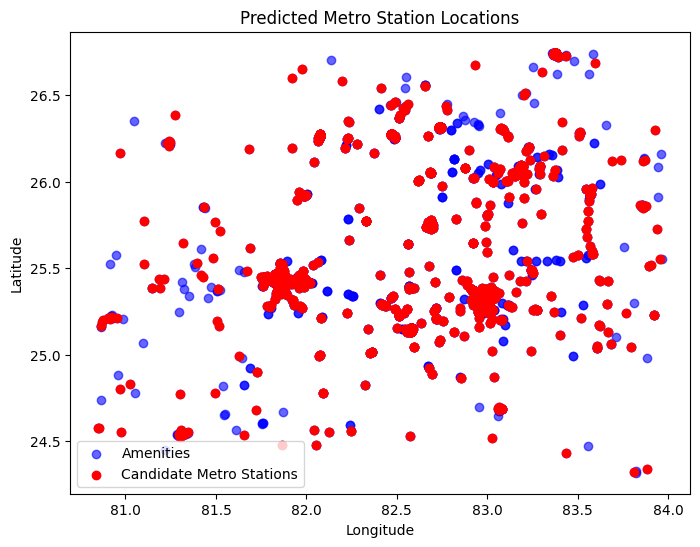

In [14]:

# Plot the original train data and predicted metro stations
plt.figure(figsize=(8, 6))
plt.scatter(train_data['Longitude'], train_data['Latitude'], color='blue', label='Amenities', alpha=0.6)
plt.scatter(predicted_positions[:, 1], predicted_positions[:, 0], color='red', label='Candidate Metro Stations')
plt.title('Predicted Metro Station Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()